In [3]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [69]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [5]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


#### Part 1

In [6]:
df1 = rr_2016[['distance','speed','temperature','elevation','power','latitude','longitude','cadence','hr','elevation_gain','timedelta']]
df3 = tt_2016[['distance','speed','temperature','elevation','power','latitude','longitude','cadence','hr','elevation_gain','timedelta']]
df2 = rr_2019[['distance','speed','temperature','elevation','power','latitude','longitude','cadence','hr','elevation_gain','timedelta']]
df4 = tt_2019[['distance','speed','temperature','elevation','power','latitude','longitude','cadence','hr','elevation_gain','timedelta']]

In [7]:
df1.shape
#1 First -> summation of distance for each df

(2822, 11)

In [8]:
Total_distance_rr_2016 = df1['distance'].sum()
Total_distance_rr_2019 = df2['distance'].sum()
Total_distance_tt_2016 = df3['distance'].sum()
Total_distance_tt_2019 = df4['distance'].sum()

In [9]:
print("Overall distance for rr_2016 = ",Total_distance_rr_2016)

Overall distance for rr_2016 =  49.04858574628638


In [10]:
print("Overall distance for rr_2019 = ",Total_distance_rr_2019)

Overall distance for rr_2019 =  51.78913253596059


In [11]:
print("Overall distance for tt_2016 = ",Total_distance_tt_2016)

Overall distance for tt_2016 =  24.80288703130808


In [24]:
print("Overall distance for tt_2019 = ",Total_distance_tt_2019)

Overall distance for tt_2019 =  24.38014504376575


In [12]:
avgs_rr_2016 = df1["speed"].mean()
avgs_rr_2019 = df2["speed"].mean()
avgs_tt_2016 = df3["speed"].mean()
avgs_tt_2019 = df4["speed"].mean()


In [45]:
print("Average speed for rr_2016 = ", avgs_rr_2016)
print("Average speed for rr_2019 = ", avgs_rr_2019)
print("Average speed for tt_2016 = ", avgs_tt_2016)
print("Average speed for tt_2019 = ", avgs_tt_2019)

Average speed for rr_2016 =  34.93308475482947
Average speed for rr_2019 =  33.87986137188044
Average speed for tt_2016 =  33.52996304869014
Average speed for tt_2019 =  33.05782378815691


In [13]:
avgt_rr_2016 = df1['temperature'].mean()
avgt_rr_2019 = df2["temperature"].mean()
avgt_tt_2016 = df3["temperature"].mean()
avgt_tt_2019 = df4["temperature"].mean()

In [38]:
print("Average temperature for rr_2016 = ", avgt_rr_2016)
print("Average temperature for rr_2019 = ", avgt_rr_2019)
print("Average temperature for tt_2016 = ", avgt_tt_2016)
print("Average temperature for tt_2019 = ", avgt_tt_2019)

Average temperature for rr_2016 =  25.280652019844084
Average temperature for rr_2019 =  5.997819371252044
Average temperature for tt_2016 =  10.953277092796885
Average temperature for tt_2019 =  10.194350282485876


In [14]:
avge_rr_2016 = df1["elevation"].mean()
avge_rr_2019 = df2["elevation"].mean()
avge_tt_2016 = df3["elevation"].mean()
avge_tt_2019 = df4["elevation"].mean()

print("Average elevation for rr_2016 = ", avge_rr_2016)
print("Average elevation for rr_2019 = ", avge_rr_2019)
print("Average elevation for tt_2016 = ", avge_tt_2016)
print("Average elevation for tt_2019 = ", avge_tt_2019)

Average elevation for rr_2016 =  232.40446491849806
Average elevation for rr_2019 =  243.24357623114642
Average elevation for tt_2016 =  139.06865671641827
Average elevation for tt_2019 =  250.435103578155


In [15]:
avgp_rr_2016 = df1["power"].mean()
avgp_rr_2019 = df2["power"].mean()
avgp_tt_2016 = df3["power"].mean()
avgp_tt_2019 = df4["power"].mean()

print("Average power for rr_2016 = ", avgp_rr_2016)
print("Average power for rr_2019 = ", avgp_rr_2019)
print("Average power for tt_2016 = ", avgp_tt_2016)
print("Average power for tt_2019 = ", avgp_tt_2019)

Average power for rr_2016 =  0.0
Average power for rr_2019 =  213.61784481192078
Average power for tt_2016 =  0.0
Average power for tt_2019 =  257.5668549905838


In [16]:
print("Summary of rr_2016: ")
print("Overall distance for rr_2016 = ",Total_distance_rr_2016)
print("Average speed for rr_2016 = ", avgs_rr_2016)
print("Average temperature for rr_2016 = ", avgt_rr_2016)
print("Average elevation for rr_2016 = ", avge_rr_2016)
print("Average power for rr_2016 = ", avgp_rr_2016)

Summary of rr_2016: 
Overall distance for rr_2016 =  49.04858574628638
Average speed for rr_2016 =  34.93308475482947
Average temperature for rr_2016 =  25.280652019844084
Average elevation for rr_2016 =  232.40446491849806
Average power for rr_2016 =  0.0


In [17]:
print("Summary of rr_2019: ")
print("Overall distance for rr_2019 = ",Total_distance_rr_2019)
print("Average speed for rr_2019 = ", avgs_rr_2019)
print("Average temperature for rr_2019 = ", avgt_rr_2019)
print("Average elevation for rr_2019 = ", avge_rr_2019)
print("Average power for rr_2019 = ", avgp_rr_2019)

Summary of rr_2019: 
Overall distance for rr_2019 =  51.78913253596059
Average speed for rr_2019 =  33.87986137188044
Average temperature for rr_2019 =  5.997819371252044
Average elevation for rr_2019 =  243.24357623114642
Average power for rr_2019 =  213.61784481192078


In [18]:
print("Summary of tt_2016: ")
print("Overall distance for tt_2016 = ",Total_distance_tt_2016)
print("Average speed for tt_2016 = ", avgs_tt_2016)
print("Average temperature for tt_2016 = ", avgt_tt_2016)
print("Average elevation for tt_2016 = ", avge_tt_2016)
print("Average power for tt_2016 = ", avgp_tt_2016)

Summary of tt_2016: 
Overall distance for tt_2016 =  24.80288703130808
Average speed for tt_2016 =  33.52996304869014
Average temperature for tt_2016 =  10.953277092796885
Average elevation for tt_2016 =  139.06865671641827
Average power for tt_2016 =  0.0


In [19]:
print("Summary of tt_2019: ")
print("Overall distance for tt_2019 = ",Total_distance_tt_2019)
print("Average speed for tt_2019 = ", avgs_tt_2019)
print("Average temperature for tt_2019 = ", avgt_tt_2019)
print("Average elevation for tt_2019 = ", avge_tt_2019)
print("Average power for tt_2019 = ", avgp_tt_2019)

Summary of tt_2019: 
Overall distance for tt_2019 =  24.38014504376575
Average speed for tt_2019 =  33.05782378815691
Average temperature for tt_2019 =  10.194350282485876
Average elevation for tt_2019 =  250.435103578155
Average power for tt_2019 =  257.5668549905838


In [20]:
print("More in depth Summary for rr_2016")
df1.describe()

More in depth Summary for rr_2016


,distance,speed,temperature,elevation,power,latitude,longitude,cadence,hr,elevation_gain,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,0.017381,34.933085,25.280652,232.404465,0.0,-33.368017,151.225527,65.987952,158.394401,-0.003756,1.843318
std,0.015695,10.738677,1.348746,29.725934,0.0,0.028329,0.006014,34.425881,11.304588,0.458872,1.692364
min,0.000000,0.000000,24.000000,176.000000,0.0,-33.416753,151.211496,0.000000,102.000000,-1.600000,1.000000
25%,0.007894,26.656312,24.000000,209.450000,0.0,-33.393691,151.221912,68.000000,151.000000,-0.400000,1.000000
50%,0.011794,33.307339,25.000000,226.100000,0.0,-33.371820,151.227236,79.000000,158.000000,0.000000,1.000000
75%,0.016899,42.871885,26.000000,258.200000,0.0,-33.342269,151.230069,87.000000,166.000000,0.400000,2.000000
max,0.076283,92.749036,30.000000,295.800000,0.0,-33.316890,151.235131,117.000000,205.000000,1.200000,9.000000


In [53]:
print("More in depth Summary for rr_2019")
df2.describe()

More in depth Summary for rr_2019


,distance,speed,temperature,elevation,power,latitude,longitude,cadence,hr,elevation_gain,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,0.009411,33.879861,5.997819,243.243576,213.617845,-33.371644,151.225232,70.004906,138.998546,0.000254,1.0
std,0.002459,8.853503,0.806414,30.197981,144.123686,0.030592,0.006142,29.869938,16.184123,0.347322,0.0
min,0.000000,0.000000,0.000000,185.200000,0.000000,-33.422174,151.211507,0.000000,71.000000,-2.000000,1.0
25%,0.007839,28.219962,5.000000,219.600000,104.000000,-33.396939,151.221591,66.000000,129.000000,-0.200000,1.0
50%,0.009178,33.041360,6.000000,236.000000,212.000000,-33.373835,151.227064,81.000000,142.000000,0.000000,1.0
75%,0.010733,38.640026,7.000000,269.600000,308.000000,-33.344994,151.229977,89.000000,152.000000,0.200000,1.0
max,0.019547,70.370469,7.000000,310.400000,785.000000,-33.316865,151.235094,120.000000,170.000000,1.000000,1.0


In [54]:
print("More in depth Summary for tt_2016")
df3.describe()

More in depth Summary for tt_2016


,distance,speed,temperature,elevation,power,latitude,longitude,cadence,hr,elevation_gain,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,0.016095,33.529963,10.953277,139.068657,0.0,-33.368105,151.225411,83.277093,170.939650,-0.002466,1.783766
std,0.015897,11.519681,0.657937,30.301132,0.0,0.028055,0.006166,21.169978,23.392548,0.515343,1.822713
min,0.000000,0.000000,10.000000,85.000000,0.0,-33.418368,151.211206,0.000000,100.000000,-7.400000,1.000000
25%,0.007622,25.068271,11.000000,116.200000,0.0,-33.393795,151.221870,77.000000,157.000000,-0.400000,1.000000
50%,0.010974,32.840076,11.000000,134.000000,0.0,-33.370613,151.227333,86.000000,161.000000,0.000000,1.000000
75%,0.015960,41.470522,11.000000,165.400000,0.0,-33.343332,151.230072,96.000000,180.000000,0.400000,2.000000
max,0.288175,162.505764,13.000000,202.600000,0.0,-33.316888,151.235137,118.000000,251.000000,2.400000,31.000000


In [55]:
print("More in depth Summary for tt_2019")
df4.describe()

More in depth Summary for tt_2019


,distance,speed,temperature,elevation,power,latitude,longitude,cadence,hr,elevation_gain,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,0.009183,33.057824,10.194350,250.435104,257.566855,-33.368391,151.225397,89.979661,152.741243,0.000377,1.0
std,0.002715,9.773522,0.833934,29.434104,80.023555,0.028682,0.006234,17.543883,8.217632,0.298628,0.0
min,0.000000,0.000000,9.000000,195.800000,0.000000,-33.415798,151.211507,0.000000,88.000000,-1.600000,1.0
25%,0.007345,26.440757,10.000000,229.200000,213.500000,-33.394910,151.221400,88.000000,150.000000,-0.200000,1.0
50%,0.009228,33.220108,10.000000,243.800000,264.000000,-33.370118,151.227363,94.000000,153.000000,0.000000,1.0
75%,0.010913,39.286242,10.000000,276.200000,308.000000,-33.343803,151.230040,98.000000,158.000000,0.200000,1.0
max,0.017584,63.300734,13.000000,312.200000,522.000000,-33.316882,151.235098,111.000000,166.000000,0.600000,1.0


#### Part 2

In [63]:
print("Range of speed for rr_2016 is ", "(",df1.speed.min(), ",", df1.speed.max(), ")")
print("Range of speed for rr_2019 is ", "(",df2.speed.min(), ",", df2.speed.max(), ")")
print("Range of speed for tt_2016 is ", "(",df3.speed.min(), ",", df3.speed.max(), ")")
print("Range of speed for tt_2019 is ", "(",df4.speed.min(), ",", df4.speed.max(), ")")
print("Time trials are faster than road races for 2019")
print("Road races are faster than time trials for 2016")

Range of speed for rr_2016 is  ( 0.0 , 92.74903649913952 )
Range of speed for rr_2019 is  ( 0.0 , 70.37046868335639 )
Range of speed for tt_2016 is  ( 0.0 , 162.50576377606754 )
Range of speed for tt_2019 is  ( 0.0 , 63.300734121945005 )
Time trials are faster than road races for 2019
Road races are faster than time trials for 2016


In [21]:
df5 = tt_2016[['speed']]
df6 = tt_2019[['speed']]
df5.shape
df5.head()

,speed
2016-07-02 23:05:30+00:00,0.000000
2016-07-02 23:05:32+00:00,11.089134
2016-07-02 23:05:38+00:00,0.991282
2016-07-02 23:06:01+00:00,0.249655
2016-07-02 23:06:02+00:00,5.742071


In [22]:
df6.shape

(2655, 1)

In [83]:
# This command shows where the speeds of tt_2016 was greater than tt_2019
# If speed of tt_2016 > speed of tt-2019 then it will return TRUE(meaning tt_2016 was faster), else -> FALSE(meaning tt_2016 was slower)
df5.gt(df6)


,speed
2016-07-02 23:05:30+00:00,False
2016-07-02 23:05:32+00:00,False
2016-07-02 23:05:38+00:00,False
2016-07-02 23:06:01+00:00,False
2016-07-02 23:06:02+00:00,False
...,...
2019-06-01 23:39:05+00:00,False
2019-06-01 23:39:06+00:00,False
2019-06-01 23:39:07+00:00,False
2019-06-01 23:39:08+00:00,False


In [24]:
print('Speed range for road race in 2016: %.2f to %.2f km/hr' %(min(rr_2016['speed']),max(rr_2016['speed'])))
print('Speed range for time trial in 2016: %.2f to %.2f km/hr' %(min(tt_2016['speed']),max(tt_2016['speed'])))
print('Speed range for road race in 2019: %.2f to %.2f km/hr' %(min(rr_2019['speed']),max(rr_2019['speed'])))
print('Speed range for time trial in 2019: %.2f to %.2f km/hr' %(min(tt_2019['speed']),max(tt_2019['speed'])))

Speed range for road race in 2016: 0.00 to 92.75 km/hr
Speed range for time trial in 2016: 0.00 to 162.51 km/hr
Speed range for road race in 2019: 0.00 to 70.37 km/hr
Speed range for time trial in 2019: 0.00 to 63.30 km/hr


It is clearly seen that speed range for time trial in 2016 was much higher than speed range of road race in 2016. However, in 2019 the speed range for time trial is just about 7km/hr less by max speed than the road race. Hence, for all years it cannot stated that time trials are faster than road race, however, on an average for the two considered it is found that average speed in time trial is faster than road race.

#### Part 3

In [28]:
print('Average speed of time trial in 2016: %.2f km/hr' %(np.mean(tt_2016['speed'])))
print('Average speed of time trial in 2019: %.2f km/hr' %(np.mean(tt_2019['speed'])))

Average speed of time trial in 2016: 33.53 km/hr
Average speed of time trial in 2019: 33.06 km/hr


In [37]:
tt_2016['speed'].tail()

2016-07-02 23:50:39+00:00    44.980624
2016-07-02 23:50:41+00:00    43.885165
2016-07-02 23:50:45+00:00    43.716017
2016-07-02 23:51:16+00:00    33.465472
2016-07-02 23:51:17+00:00    14.995824
Name: speed, dtype: float64

In [38]:
tt_2019['speed'].tail()

2019-06-01 23:39:05+00:00    44.363507
2019-06-01 23:39:06+00:00    44.009916
2019-06-01 23:39:07+00:00    43.960218
2019-06-01 23:39:08+00:00    43.440736
2019-06-01 23:39:09+00:00    43.269479
Name: speed, dtype: float64

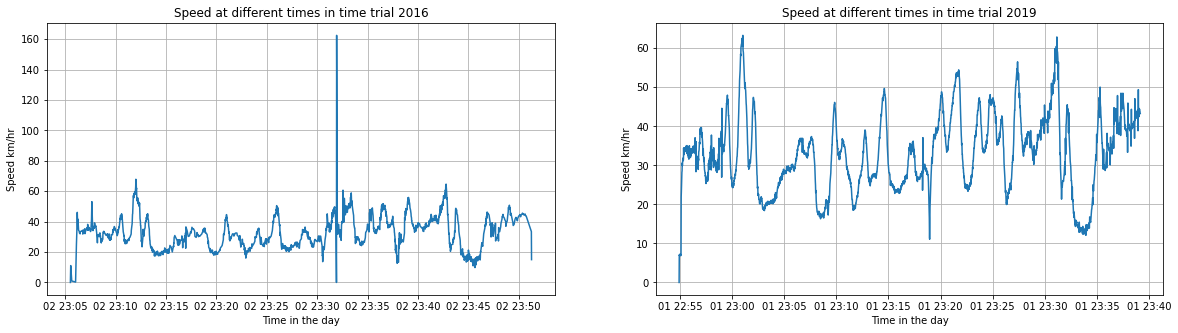

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(tt_2016['speed'])
plt.grid()
plt.xlabel('Time in the day')
plt.ylabel('Speed km/hr')
plt.title('Speed at different times in time trial 2016')
plt.subplot(122)
plt.plot(tt_2019['speed'])
plt.title('Speed at different times in time trial 2019')
plt.xlabel('Time in the day')
plt.ylabel('Speed km/hr')
plt.grid()
plt.show()

It is observed that the speeds at time trial 2016 and 2019 as performed on 2nd July 2016 and 1st June 2019 are almost similar for most of the times in the day, except between time 23 hrs 30 mins and 23 hrs 35 mins for short moment of the speed rose sharply over 160 km/hr in the 2016 time trial, however, no sudden rise of that amount is observed in the 2019 time trial.

#### Part 4

In [71]:
# Cycle on flat surface is assumed to have very less elevation gain typically in the interval of -0.05 to 0.05 meters
cond_list = [(rr_2016['elevation_gain'] >=-0.05) & (rr_2016['elevation_gain'] <=0.05),rr_2016['elevation_gain']<-0.05]
choicelist=['flat','descending']
rr_2016["elev_type"] = np.select(condlist=cond_list,choicelist=choicelist,default='climbing')
cond_list = [(rr_2019['elevation_gain'] >=-0.05) & (rr_2019['elevation_gain'] <=0.05),rr_2019['elevation_gain']<-0.05]
rr_2019["elev_type"] = np.select(condlist=cond_list,choicelist=choicelist,default='climbing')
cond_list = [(tt_2019['elevation_gain'] >=-0.05) & (tt_2019['elevation_gain'] <=0.05),tt_2019['elevation_gain']<-0.05]
tt_2019["elev_type"] = np.select(condlist=cond_list,choicelist=choicelist,default='climbing')
cond_list = [(tt_2016['elevation_gain'] >=-0.05) & (tt_2016['elevation_gain'] <=0.05),tt_2016['elevation_gain']<-0.05]
tt_2016["elev_type"] = np.select(condlist=cond_list,choicelist=choicelist,default='climbing')

In [72]:
print('Road race 2016 Average speeds in km/hr on three different cases:\n',\
      rr_2016.groupby(by='elev_type',as_index=False).mean()[['elev_type','speed']])
print('Road race 2019 Average speeds in km/hr on three different cases:\n',\
      rr_2019.groupby(by='elev_type',as_index=False).mean()[['elev_type','speed']])
print('Time trial 2016 Average speeds in km/hr on three different cases:\n',\
      tt_2016.groupby(by='elev_type',as_index=False).mean()[['elev_type','speed']])
print('Time trial 2019 Average speeds in km/hr on three different cases:\n',\
      tt_2019.groupby(by='elev_type',as_index=False).mean()[['elev_type','speed']])

Road race 2016 Average speeds in km/hr on three different cases:
     elev_type      speed
0    climbing  26.388561
1  descending  45.933841
2        flat  34.379637
Road race 2019 Average speeds in km/hr on three different cases:
     elev_type      speed
0    climbing  28.815089
1  descending  41.167089
2        flat  33.458463
Time trial 2016 Average speeds in km/hr on three different cases:
     elev_type      speed
0    climbing  24.582852
1  descending  44.880480
2        flat  34.249664
Time trial 2019 Average speeds in km/hr on three different cases:
     elev_type      speed
0    climbing  26.025625
1  descending  42.664764
2        flat  33.295912


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [61]:
rr_2016['development'] = (1000/60)*(rr_2016['speed']/rr_2016['cadence'])
rr_2019['development'] = (1000/60)*(rr_2019['speed']/rr_2019['cadence'])
tt_2016['development'] = (1000/60)*(tt_2016['speed']/tt_2016['cadence'])
tt_2019['development'] = (1000/60)*(tt_2019['speed']/tt_2019['cadence'])

In [62]:
# removing the outliers (development over 10 m and under 2 m)
rr_2016 = rr_2016[(rr_2016['development'] >= 2) & (rr_2016['development'] <=10)]
rr_2019 = rr_2019[(rr_2019['development'] >= 2) & (rr_2019['development'] <=10)]
tt_2016 = tt_2016[(tt_2016['development'] >= 2) & (tt_2016['development'] <=10)]
tt_2019 = tt_2019[(tt_2019['development'] >= 2) & (tt_2019['development'] <=10)]

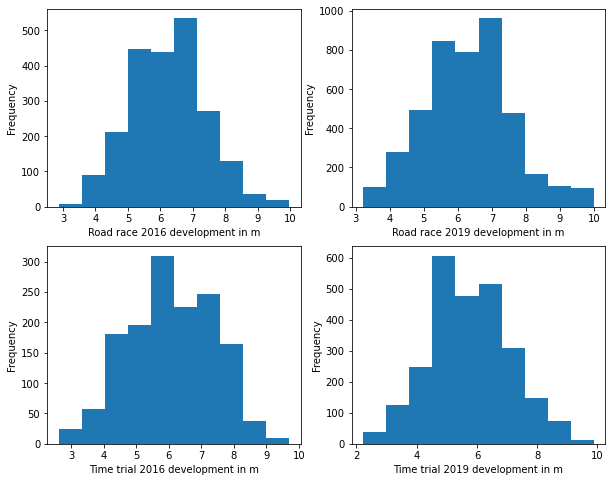

In [67]:
plt.figure(figsize=(10,8))
plt.subplot(221)
rr_2016['development'].plot.hist(legend=None)
plt.xlabel('Road race 2016 development in m')
plt.subplot(222)
rr_2019['development'].plot.hist(legend=None)
plt.xlabel('Road race 2019 development in m')
plt.subplot(223)
tt_2016['development'].plot.hist(legend=None)
plt.xlabel('Time trial 2016 development in m')
plt.subplot(224)
tt_2019['development'].plot.hist(legend=None)
plt.xlabel('Time trial 2019 development in m')
plt.show()

It is clearly observed that the distribution of development for all four rides are more or less symmetric. However, maximum development is highest in road race 2019 while the maximum development in all the time in the ride day is lowest for time trial in 2016. In all four rides another common thing is that most of times development was found in the 5 to 7 meters range.